# Overview

In XGBoost 2.0, it add vector-leaf treemodels for multi-target regression and classification tasks. It allows XGBoost to construct a single tree for all the targetsm rather than building separate models for each target as it did previously.

# Load data

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pandas_datareader as pdr

# Define the date range
start_date = '1960-01-01'
end_date = '2020-01-01'

# Fetch the S&P 500 data and drop any missing values
data = pdr.get_data_fred('SP500', start=start_date, end=end_date).dropna()

# Create a Plotly line plot to visualize the time series
fig = go.Figure()

# Add trace for the S&P 500 data
fig.add_trace(go.Scatter(x=data.index, y=data['SP500'], mode='lines', name='S&P 500'))

# Customize the layout
fig.update_layout(
    title='S&P 500 Index',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    autosize=False,
    width=1000,
    height=500
)

# Show the plot
fig.show()

# Preprocessing data

In [2]:
def data_preprocessing(data, num_lags, train_test_split):
    x=[]
    y=[]
    for i in range(len(data)-num_lags):
        x.append(data[i:i+num_lags])
        y.append(data[i+num_lags])
    # convert the data to numpy arrays
    x=np.array(x)
    y=np.array(y)
    
    # split the data into training and testing sets
    split_index=int(train_test_split*len(x))
    x_train=x[:split_index]
    y_train=y[:split_index]
    x_test=x[split_index:]
    y_test=y[split_index:]
    
    return x_train, y_train, x_test, y_test

start_date='1960-01-01'
end_date='2020-01-01'

# set the time index if it's not already set
data = (pdr.get_data_fred('SP500', start = start_date, end = end_date).dropna())
# Perform differencing to make the data stationary
data_diff = data.diff().dropna()
# You can choose an appropriate split point based on your data
data_diff = np.reshape(np.array(data_diff), (-1))
x_train, y_train, x_test, y_test = data_preprocessing(data_diff, 100, 0.80)

# Load the model

In [3]:
from xgboost import XGBRegressor

model=XGBRegressor(random_state=0, n_estimators=64, max_depth=64)

# Training the model

In [4]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=64, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=64, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

# Inference

In [5]:
y_pred_xgb=model.predict(x_test)

# Visualization the result

Hit Ratio XGBoost =  51.229508196721305 %


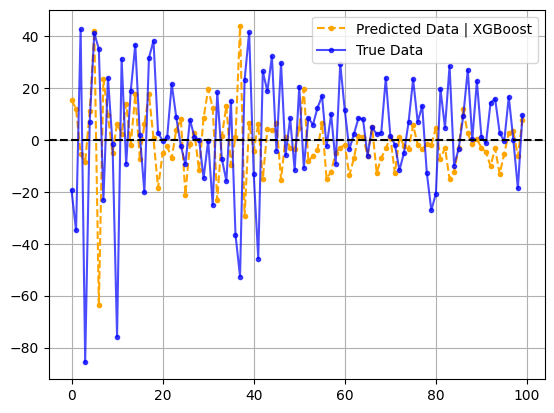

In [6]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(y_pred_xgb[-100:], label='Predicted Data | XGBoost', linestyle='--', marker = '.', color = 'orange')
plt.plot(y_test[-100:], label='True Data', marker = '.', alpha = 0.7, color = 'blue')
plt.legend()
plt.grid()
plt.axhline(y = 0, color = 'black', linestyle = '--')

same_sign_count = np.sum(np.sign(y_pred_xgb) == np.sign(y_test)) / len(y_test) * 100
print('Hit Ratio XGBoost = ', same_sign_count, '%')

# Reference 

* https://www.kaggle.com/code/aisuko/time-series-forecasting-with-bayesian-regression
* https://medium.com/@kaabar-sofien/xgboost-2-0-is-here-to-improve-your-time-series-forecasts-98fd35aaca40